# Проект: Линейные модели в машинном обучении

### Описание проекта

Вы работаете в IT-компании, которая выполняет на заказ проекты по машинному обучению. К вам обратился фермер, владелец молочного хозяйства «Вольный луг». Он хочет купить бурёнок, чтобы расширить поголовье стада коров. Для этого он заключил выгодный контракт с ассоциацией пастбищ «ЭкоФерма».
Условия позволяют фермеру очень тщательно отобрать коров. Он определяет качество молока по строгой методике, и при этом ему нужно выполнять свой план развития молочного хозяйства. Фермер хочет, чтобы каждая бурёнка давала не менее 6000 килограммов молока в год, а её надой был вкусным — строго по его критериям, ничуть не хуже. А продавцы и технологи так и норовят приукрасить своих коровок!
Поэтому он просит вас разработать модель машинного обучения, которая поможет ему управлять рисками и принимать объективное решение о покупке. «ЭкоФерма» готова предоставить подробные данные о своих коровах. Вам нужно создать две прогнозные модели для отбора бурёнок в поголовье:
Первая будет прогнозировать возможный удой коровы (целевой признак Удой);
Вторая — рассчитывать вероятность получить вкусное молоко от коровы (целевой признак Вкус молока).
С помощью модели нужно отобрать коров по двум критериям:
средний удой за год — не менее 6000 килограммов;
молоко должно быть вкусным.

## Шаг 1. Загрузка и изучение данных

### Ипорт библиотек

In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st

from scipy.stats import binom, norm
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder 
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix

### Загрузка данных

In [2]:
ferma_main=pd.read_csv('https://code.s3.yandex.net/datasets/ferma_main.csv',sep=';')
ferma_dad=pd.read_csv('https://code.s3.yandex.net/datasets/ferma_dad.csv',sep=';')
cow_buy=pd.read_csv('https://code.s3.yandex.net/datasets/cow_buy.csv',sep=';')

In [3]:
def dataset_info(dataset,name):
    display(f'Анализ датафрейма {name}')
    display(dataset.head(5))
    display(f'Количество пустых ячеек:')
    display(dataset.isnull().sum())
    display(dataset.info())
    display(f'Количество явных дубликатов в датасете:{dataset.duplicated().sum()}' )

In [4]:
dataset_info(ferma_main, 'ferma_main')

'Анализ датафрейма ferma_main'

id  Удой, кг ЭКЕ (Энергетическая кормовая единица)  Сырой протеин, г  \
0   1      5863                                  14,2              1743   
1   2      5529                                  12,8              2138   
2   3      5810                                    14              1854   
3   4      5895                                  12,4              2012   
4   5      5302                                  12,8              1675   

  СПО (Сахаро-протеиновое соотношение)           Порода Тип пастбища  \
0                                 0,89   Вис Бик Айдиал    Равнинное   
1                                 0,89   Вис Бик Айдиал    Равнинные   
2                                0,885  РефлешнСоверинг    Холмистое   
3                                0,885  РефлешнСоверинг    Холмистое   
4                                0,885   Вис Бик Айдиал    Равнинные   

  порода папы_быка Жирность,% Белок,% Вкус молока      Возраст  
0           Айдиал       3,58   3,076      вкусно  более_2_лет  
1          Соверин       3,54   3,079      вкусно  менее_2_лет  
2          Соверин       3,59   3,074   не вкусно  более_2_лет  
3           Айдиал        3,4   3,075   не вкусно  более_2_лет  
4          Соверин       3,73   3,073      вкусно  менее_2_лет

'Количество пустых ячеек:'

id                                       0
Удой, кг                                 0
ЭКЕ (Энергетическая кормовая единица)    0
Сырой протеин, г                         0
СПО (Сахаро-протеиновое соотношение)     0
Порода                                   0
Тип пастбища                             0
порода папы_быка                         0
Жирность,%                               0
Белок,%                                  0
Вкус молока                              0
Возраст                                  0
dtype: int64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 634 entries, 0 to 633
Data columns (total 12 columns):
 #   Column                                 Non-Null Count  Dtype 
---  ------                                 --------------  ----- 
 0   id                                     634 non-null    int64 
 1   Удой, кг                               634 non-null    int64 
 2   ЭКЕ (Энергетическая кормовая единица)  634 non-null    object
 3   Сырой протеин, г                       634 non-null    int64 
 4   СПО (Сахаро-протеиновое соотношение)   634 non-null    object
 5   Порода                                 634 non-null    object
 6   Тип пастбища                           634 non-null    object
 7   порода папы_быка                       634 non-null    object
 8   Жирность,%                             634 non-null    object
 9   Белок,%                                634 non-null    object
 10  Вкус молока                            634 non-null    object
 11  Возраст            

None

'Количество явных дубликатов в датасете:5'

### Вывод
в датафрейме имеются явные дубликаты, некорректны типы столбцов, стоит преобразовать в нижний регистр значения ячеек для удаления неявных дубликатов

In [5]:
dataset_info(ferma_dad, 'ferma_dad')

'Анализ датафрейма ferma_dad'

id  Имя Папы
0   1    Буйный
1   2  Соловчик
2   3     Барин
3   4    Буйный
4   5     Барин

'Количество пустых ячеек:'

id          0
Имя Папы    0
dtype: int64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 629 entries, 0 to 628
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        629 non-null    int64 
 1   Имя Папы  629 non-null    object
dtypes: int64(1), object(1)
memory usage: 10.0+ KB


None

'Количество явных дубликатов в датасете:0'

### Вывод
в датафрейме отутствуют дубликаты, стоит преобразовать в нижний регистр значения ячеек для удаления неявных дубликатов

In [6]:
dataset_info(cow_buy,'cow_buy')

'Анализ датафрейма cow_buy'

Порода Тип пастбища порода папы_быка  Имя_папы Текущая_жирность,%  \
0   Вис Бик Айдиал    холмистое           Айдиал  Геркулес               3,58   
1   Вис Бик Айдиал    равнинное          Соверин    Буйный               3,54   
2  РефлешнСоверинг    равнинное          Соверин     Барин               3,59   
3  РефлешнСоверинг    холмистое           Айдиал    Буйный                3,4   
4  РефлешнСоверинг    равнинное           Айдиал    Буйный               3,64   

  Текущий_уровень_белок,%      Возраст  
0                   3,076  более_2_лет  
1                   3,081  менее_2_лет  
2                   3,074  более_2_лет  
3                   3,061  более_2_лет  
4                   3,074  более_2_лет

'Количество пустых ячеек:'

Порода                     0
Тип пастбища               0
порода папы_быка           0
Имя_папы                   0
Текущая_жирность,%         0
Текущий_уровень_белок,%    0
Возраст                    0
dtype: int64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Порода                   20 non-null     object
 1   Тип пастбища             20 non-null     object
 2   порода папы_быка         20 non-null     object
 3   Имя_папы                 20 non-null     object
 4   Текущая_жирность,%       20 non-null     object
 5   Текущий_уровень_белок,%  20 non-null     object
 6   Возраст                  20 non-null     object
dtypes: object(7)
memory usage: 1.2+ KB


None

'Количество явных дубликатов в датасете:4'

### Вывод
в датафрейме имеются явные дубликаты, некорректны типы столбцов, стоит преобразовать в нижний регистр значения ячеек для удаления неявных дубликатов

## Шаг 2. Предобработка данных

In [7]:
def dataset_corrections(dataset,text_corrections):
    for i in text_corrections:
        dataset[i]=dataset[i].str.lower()
        dataset[i]=dataset[i].str.replace(' ', '')
    for j in dataset.columns:
        if j not in text_corrections and dataset[j].dtype!= np.int64:
            dataset[j]=dataset[j].astype(str).str.replace(',','.').astype(float)
    dataset.columns = map(str.lower, dataset.columns)
    dataset.columns=dataset.columns.str.replace(' ', '_')
    dataset.drop_duplicates()
    display(dataset.head(5))
    display(dataset.info())

In [8]:
dataset_corrections(ferma_dad,['Имя Папы'])

id  имя_папы
0   1    буйный
1   2  соловчик
2   3     барин
3   4    буйный
4   5     барин

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 629 entries, 0 to 628
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        629 non-null    int64 
 1   имя_папы  629 non-null    object
dtypes: int64(1), object(1)
memory usage: 10.0+ KB


None

### Вывод
в датафрейме удалены явные дубликаты, изменены типы столбцов , преобразованы в нижний регистр значения ячеек

In [9]:
dataset_corrections(ferma_main, ['Порода','Тип пастбища', 'порода папы_быка','Вкус молока', 'Возраст'])

id  удой,_кг  эке_(энергетическая_кормовая_единица)  сырой_протеин,_г  \
0   1      5863                                   14.2              1743   
1   2      5529                                   12.8              2138   
2   3      5810                                   14.0              1854   
3   4      5895                                   12.4              2012   
4   5      5302                                   12.8              1675   

   спо_(сахаро-протеиновое_соотношение)           порода тип_пастбища  \
0                                 0.890     висбикайдиал    равнинное   
1                                 0.890     висбикайдиал    равнинные   
2                                 0.885  рефлешнсоверинг    холмистое   
3                                 0.885  рефлешнсоверинг    холмистое   
4                                 0.885     висбикайдиал    равнинные   

  порода_папы_быка  жирность,%  белок,% вкус_молока      возраст  
0           айдиал        3.58    3.076      вкусно  более_2_лет  
1          соверин        3.54    3.079      вкусно  менее_2_лет  
2          соверин        3.59    3.074    невкусно  более_2_лет  
3           айдиал        3.40    3.075    невкусно  более_2_лет  
4          соверин        3.73    3.073      вкусно  менее_2_лет

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 634 entries, 0 to 633
Data columns (total 12 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     634 non-null    int64  
 1   удой,_кг                               634 non-null    int64  
 2   эке_(энергетическая_кормовая_единица)  634 non-null    float64
 3   сырой_протеин,_г                       634 non-null    int64  
 4   спо_(сахаро-протеиновое_соотношение)   634 non-null    float64
 5   порода                                 634 non-null    object 
 6   тип_пастбища                           634 non-null    object 
 7   порода_папы_быка                       634 non-null    object 
 8   жирность,%                             634 non-null    float64
 9   белок,%                                634 non-null    float64
 10  вкус_молока                            634 non-null    object 
 11  возрас

None

### Вывод
в датафрейме удалены явные дубликаты, изменены типы столбцов , преобразованы в нижний регистр значения ячеек

In [10]:
dataset_corrections(cow_buy,['Порода', 'Тип пастбища', 'порода папы_быка', 'Имя_папы','Возраст'])

порода тип_пастбища порода_папы_быка  имя_папы  \
0     висбикайдиал    холмистое           айдиал  геркулес   
1     висбикайдиал    равнинное          соверин    буйный   
2  рефлешнсоверинг    равнинное          соверин     барин   
3  рефлешнсоверинг    холмистое           айдиал    буйный   
4  рефлешнсоверинг    равнинное           айдиал    буйный   

   текущая_жирность,%  текущий_уровень_белок,%      возраст  
0                3.58                    3.076  более_2_лет  
1                3.54                    3.081  менее_2_лет  
2                3.59                    3.074  более_2_лет  
3                3.40                    3.061  более_2_лет  
4                3.64                    3.074  более_2_лет

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   порода                   20 non-null     object 
 1   тип_пастбища             20 non-null     object 
 2   порода_папы_быка         20 non-null     object 
 3   имя_папы                 20 non-null     object 
 4   текущая_жирность,%       20 non-null     float64
 5   текущий_уровень_белок,%  20 non-null     float64
 6   возраст                  20 non-null     object 
dtypes: float64(2), object(5)
memory usage: 1.2+ KB


None

### Вывод
в датафрейме удалены явные дубликаты, изменены типы столбцов , преобразованы в нижний регистр значения ячеек

In [11]:
def dataset_unique(dataset,name):
    display(f'Анализ уникальных текстовых значений датафрейма {name}')
    for j in dataset.columns:
        if dataset[j].dtype== object:
            display(f'Уникальные значения столбца {j}: {dataset[j].unique()}')

In [12]:
dataset_unique(ferma_main, 'ferma_main')

'Анализ уникальных текстовых значений датафрейма ferma_main'

"Уникальные значения столбца порода: ['висбикайдиал' 'рефлешнсоверинг']"

"Уникальные значения столбца тип_пастбища: ['равнинное' 'равнинные' 'холмистое']"

"Уникальные значения столбца порода_папы_быка: ['айдиал' 'соверин' 'айдиалл']"

"Уникальные значения столбца вкус_молока: ['вкусно' 'невкусно']"

"Уникальные значения столбца возраст: ['более_2_лет' 'менее_2_лет']"

### Вывод
В столбцах порода_папы_быка и тип_пастбища есть одинаковые имена. Заменим 'айдиалл' на 'айдиал' и 'равнинные' на 'равнинное'

In [13]:
ferma_main['порода_папы_быка'] = ferma_main['порода_папы_быка'].str.replace('айдиалл','айдиал')
ferma_main['тип_пастбища'] = ferma_main['тип_пастбища'].str.replace('равнинные','равнинное')

In [14]:
dataset_unique(ferma_main, 'ferma_main')

'Анализ уникальных текстовых значений датафрейма ferma_main'

"Уникальные значения столбца порода: ['висбикайдиал' 'рефлешнсоверинг']"

"Уникальные значения столбца тип_пастбища: ['равнинное' 'холмистое']"

"Уникальные значения столбца порода_папы_быка: ['айдиал' 'соверин']"

"Уникальные значения столбца вкус_молока: ['вкусно' 'невкусно']"

"Уникальные значения столбца возраст: ['более_2_лет' 'менее_2_лет']"

In [15]:
dataset_unique(ferma_dad, 'ferma_dad')

'Анализ уникальных текстовых значений датафрейма ferma_dad'

"Уникальные значения столбца имя_папы: ['буйный' 'соловчик' 'барин' 'геркулес']"

In [16]:
dataset_unique(cow_buy,'cow_buy')

'Анализ уникальных текстовых значений датафрейма cow_buy'

"Уникальные значения столбца порода: ['висбикайдиал' 'рефлешнсоверинг']"

"Уникальные значения столбца тип_пастбища: ['холмистое' 'равнинное']"

"Уникальные значения столбца порода_папы_быка: ['айдиал' 'соверин']"

"Уникальные значения столбца имя_папы: ['геркулес' 'буйный' 'барин' 'соловчик']"

"Уникальные значения столбца возраст: ['более_2_лет' 'менее_2_лет']"

### Вывод
В столбце порода_папы_быка есть одинаковые имена. Заменена 'айдиалл' на 'айдиал'. В остальных столбцах трех дафреймов одинаковых имен нет

## Шаг 3. Исследовательский анализ данных

In [17]:
def graphs_text(dataset,name):
    display(f'Анализ категориальных признаков датафрейма {name}')
    for j in dataset.columns:
        if dataset[j].dtype== object:
            temp= dataset.groupby(j).agg({j:'count'})
            temp.columns=['count']
            temp=temp.reset_index()
            fig = px.bar(temp, x=j, y='count', color=j,title=f'Анализ столбца {j}')
            fig.update_xaxes(title_text=j)
            fig.update_yaxes(title_text='Количество')
            fig.show()

In [18]:
graphs_text(cow_buy,'cow_buy')

'Анализ категориальных признаков датафрейма cow_buy'

### Вывод
В датафрейме 'cow_buy' распределение категориальных признаков удовлетворительное. Явные выбросы отсутсвуют 

In [19]:
graphs_text(ferma_main, 'ferma_main')

'Анализ категориальных признаков датафрейма ferma_main'

### Вывод
В датафрейме 'ferma_main' распределение категориальных признаков удовлетворительное.  По столбцу "тип_пастбища" "равнинного" меньше в разы чем остальных типов. Пока ничего изменять не будем

In [20]:
graphs_text(ferma_dad, 'ferma_dad')

'Анализ категориальных признаков датафрейма ferma_dad'

### Вывод
В датафрейме 'ferma_dad' распределение категориальных признаков удовлетворительное. Явные выбросы отсутсвуют 

In [21]:
def graphs(dataset,name):
    display(f'Анализ количественных признаков датафрейма {name}')
    for j in dataset.columns:
        if (dataset[j].dtype!= object) and j!="id":
            fig = plt.hist(dataset[j],color = 'blue', edgecolor = 'black',bins = 50)
            plt.xlabel(j)
            plt.ylabel('Количество')
            plt.title(f'Анализ столбца {j}',fontweight = "bold")
            plt.show()
            

         
        

'Анализ количественных признаков датафрейма ferma_main'

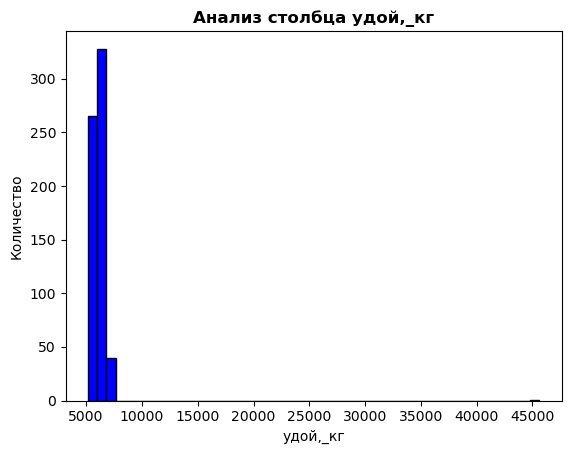

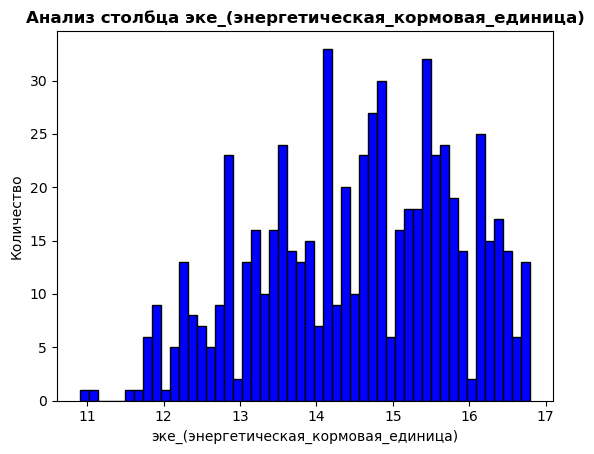

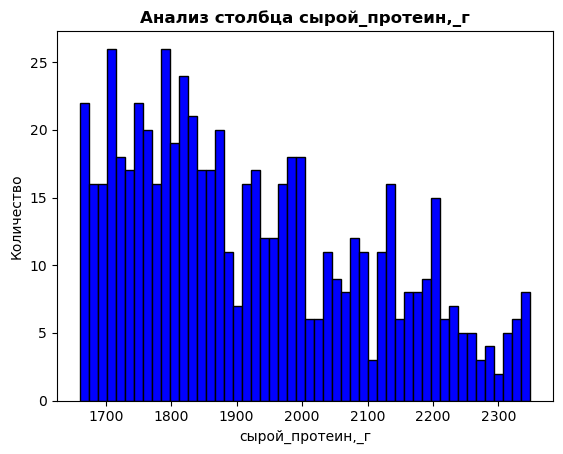

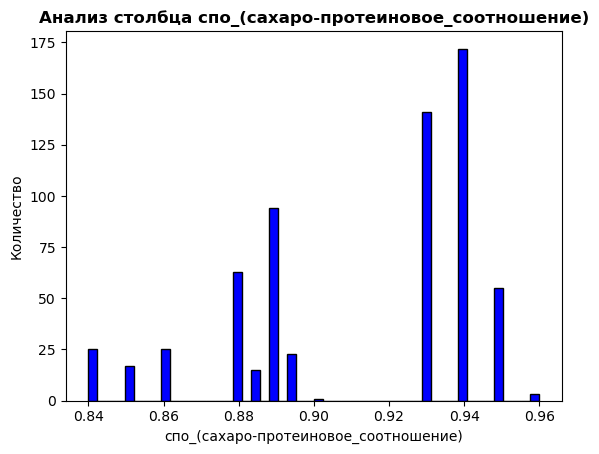

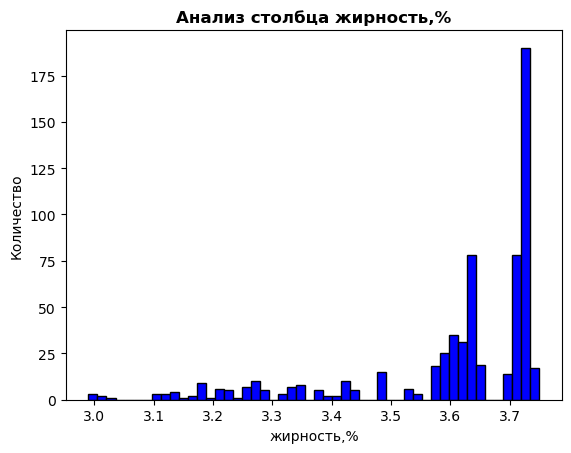

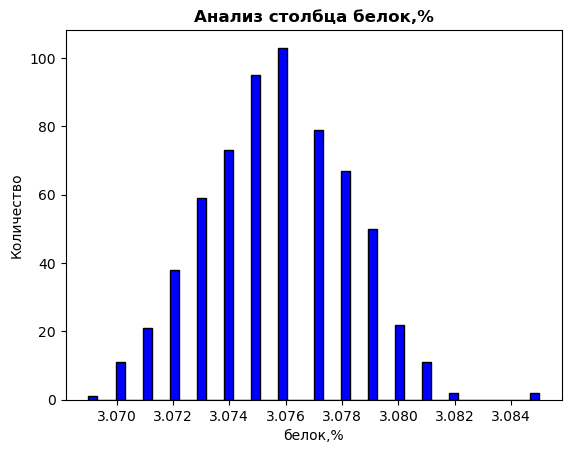

In [22]:
graphs(ferma_main, 'ferma_main')

### Вывод

Жирность носит ненормальный характер, можно перевести в категориальный признак (отметка 3.6)
СПО носит ненормальный характер, можно перевести в категориальный признак (отметка 0.91)
у параметра удой наблюдается выброс. Нужно ниже удалить значения более 10000

'Анализ количественных признаков датафрейма cow_buy'

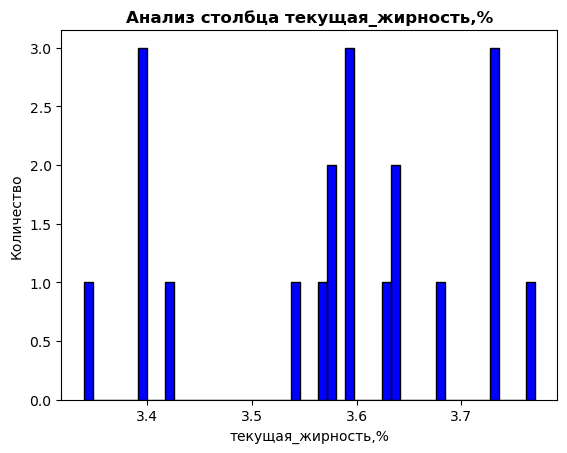

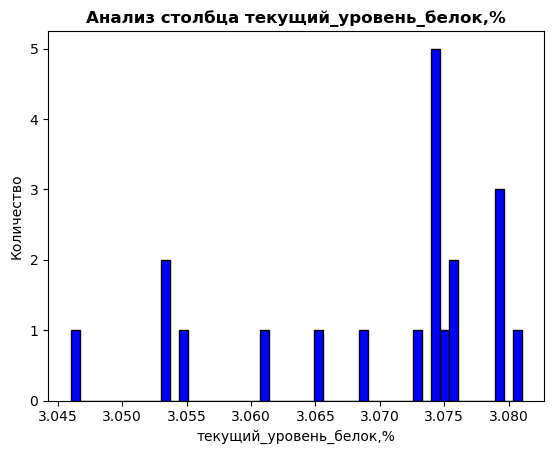

In [23]:
graphs(cow_buy,'cow_buy')

### Вывод
распределение жирности- ненормальный характер (явных пиков нет, оставим количественный признак)
распределение белка -ненормальный характер. В перспективе можно перевести в категориальную шкалу (граница 3.07)

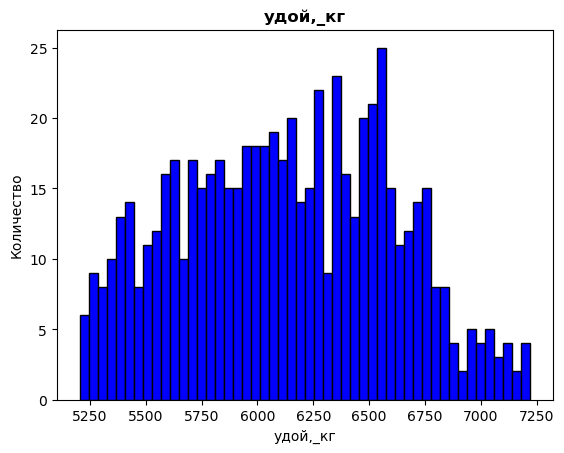

In [24]:
ferma_main = ferma_main[ferma_main['удой,_кг'] < 45000]
fig = plt.hist(ferma_main['удой,_кг'],color = 'blue', edgecolor = 'black',bins = 50)
plt.xlabel('удой,_кг')
plt.ylabel('Количество')
plt.title(f'удой,_кг',fontweight = "bold")
plt.show()

### Вывод
В столбце 'удой,_кг' удалены значения более 45000. Все графики носят ненормальный характер распределения

## Шаг 4. Корреляционный анализ признаков в датасете ferma_main.csv

In [25]:
ferma_main[['удой,_кг', 'эке_(энергетическая_кормовая_единица)','сырой_протеин,_г', 'спо_(сахаро-протеиновое_соотношение)','жирность,%', 'белок,%']].corr(method="spearman")

удой,_кг  \
удой,_кг                               1.000000   
эке_(энергетическая_кормовая_единица)  0.765972   
сырой_протеин,_г                       0.437905   
спо_(сахаро-протеиновое_соотношение)   0.788368   
жирность,%                             0.691294   
белок,%                               -0.004066   

                                       эке_(энергетическая_кормовая_единица)  \
удой,_кг                                                            0.765972   
эке_(энергетическая_кормовая_единица)                               1.000000   
сырой_протеин,_г                                                    0.384336   
спо_(сахаро-протеиновое_соотношение)                                0.740118   
жирность,%                                                          0.688392   
белок,%                                                            -0.012861   

                                       сырой_протеин,_г  \
удой,_кг                                       0.437905   
эке_(энергетическая_кормовая_единица)          0.384336   
сырой_протеин,_г                               1.000000   
спо_(сахаро-протеиновое_соотношение)           0.485260   
жирность,%                                     0.393157   
белок,%                                        0.229824   

                                       спо_(сахаро-протеиновое_соотношение)  \
удой,_кг                                                           0.788368   
эке_(энергетическая_кормовая_единица)                              0.740118   
сырой_протеин,_г                                                   0.485260   
спо_(сахаро-протеиновое_соотношение)                               1.000000   
жирность,%                                                         0.698690   
белок,%                                                            0.112386   

                                       жирность,%   белок,%  
удой,_кг                                 0.691294 -0.004066  
эке_(энергетическая_кормовая_единица)    0.688392 -0.012861  
сырой_протеин,_г                         0.393157  0.229824  
спо_(сахаро-протеиновое_соотношение)     0.698690  0.112386  
жирность,%                               1.000000  0.042505  
белок,%                                  0.042505  1.000000

In [26]:
ferma_main.info()

<class 'pandas.core.frame.DataFrame'>
Index: 633 entries, 0 to 633
Data columns (total 12 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     633 non-null    int64  
 1   удой,_кг                               633 non-null    int64  
 2   эке_(энергетическая_кормовая_единица)  633 non-null    float64
 3   сырой_протеин,_г                       633 non-null    int64  
 4   спо_(сахаро-протеиновое_соотношение)   633 non-null    float64
 5   порода                                 633 non-null    object 
 6   тип_пастбища                           633 non-null    object 
 7   порода_папы_быка                       633 non-null    object 
 8   жирность,%                             633 non-null    float64
 9   белок,%                                633 non-null    float64
 10  вкус_молока                            633 non-null    object 
 11  возраст    

In [27]:
def graphs_scatter(dataset,aim,hue):
    display(f'Анализ категориальных признаков датафрейма от целевого {aim}')
    for j in dataset.columns:
        if (dataset[j].dtype!= object) and j!=aim and  j!='id' :
            fig = sns.scatterplot(data=ferma_main, x=aim, y=j, hue = hue)
            plt.xlabel(aim)
            plt.ylabel(j)
            plt.title(f'Анализ столбца {j}',fontweight = "bold")
            plt.show()

'Анализ категориальных признаков датафрейма от целевого удой,_кг'

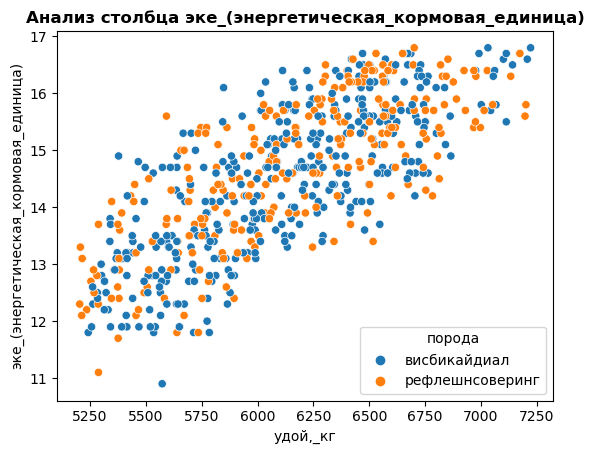

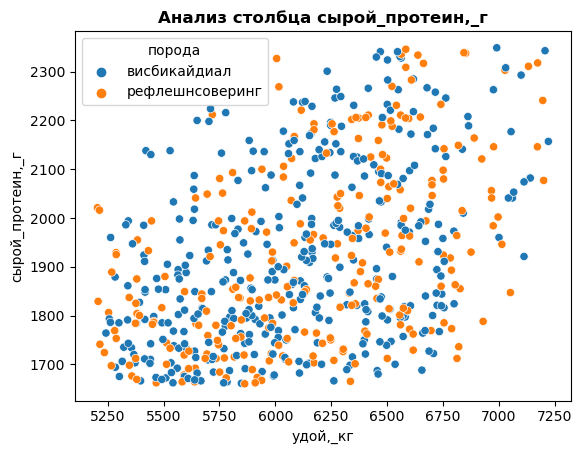

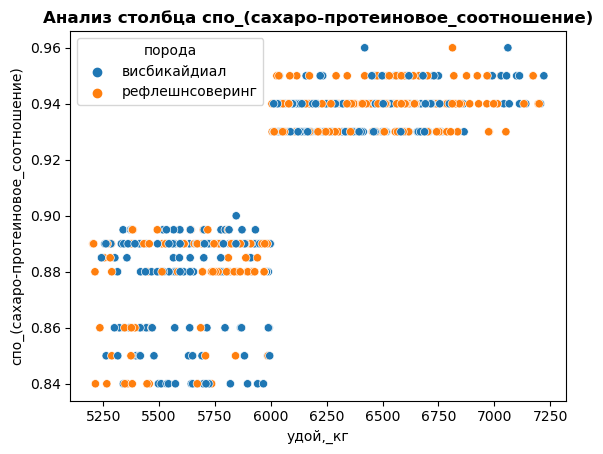

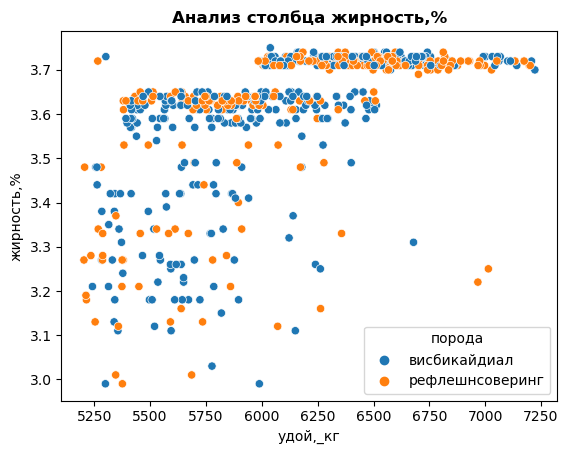

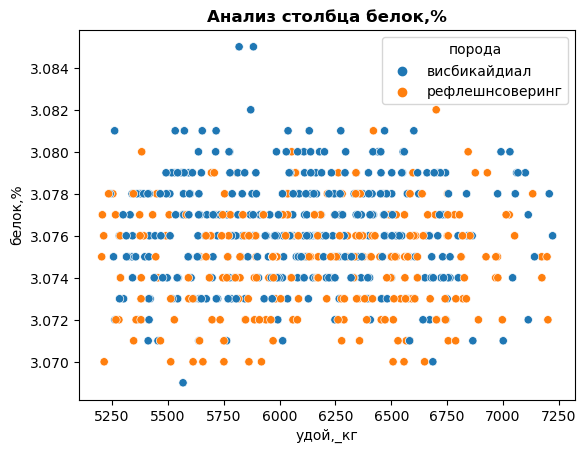

In [28]:
graphs_scatter(ferma_main, 'удой,_кг','порода')


### Вывод
Зависимость есть только для ЭКЕ и сырого протеина

'Анализ категориальных признаков датафрейма от целевого удой,_кг'

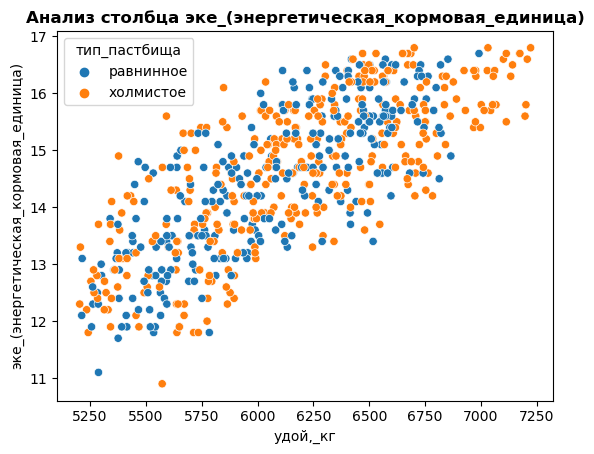

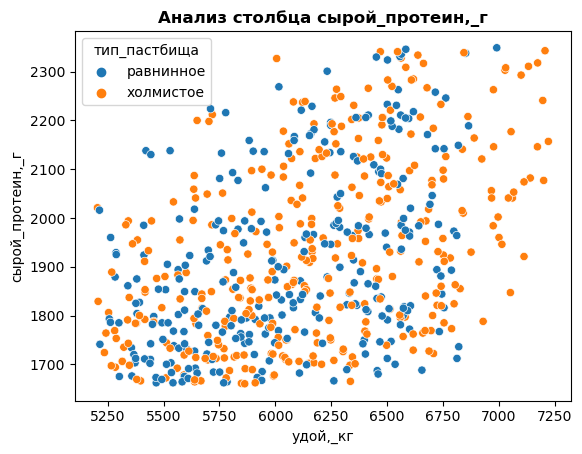

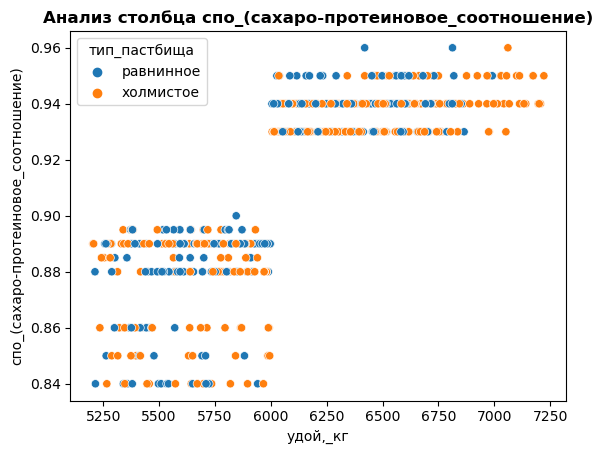

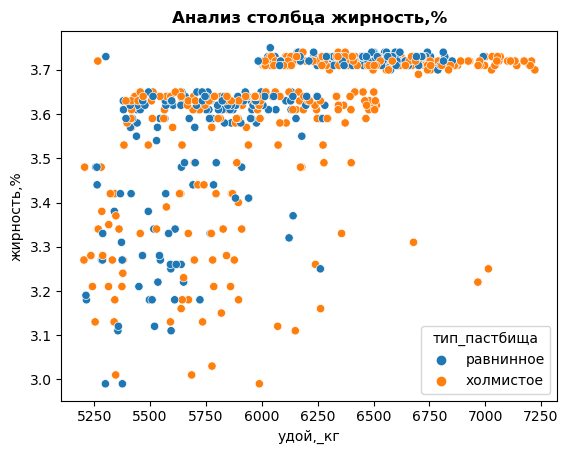

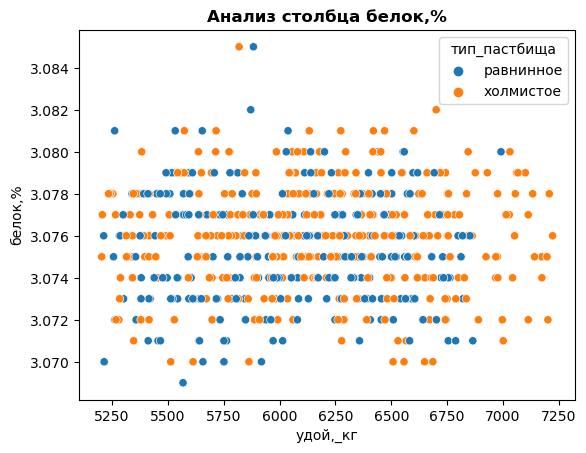

In [29]:
graphs_scatter(ferma_main, 'удой,_кг','тип_пастбища')

'Анализ категориальных признаков датафрейма от целевого удой,_кг'

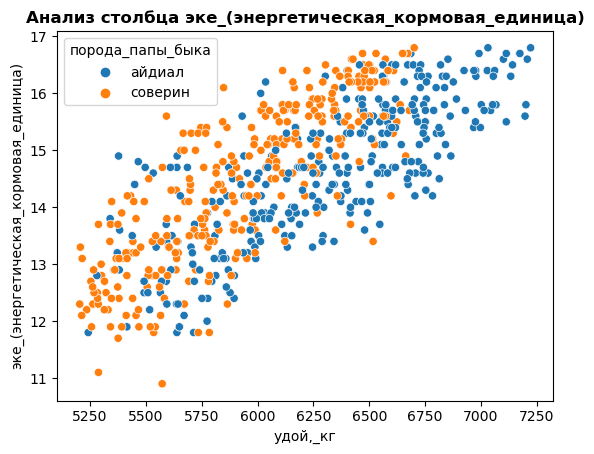

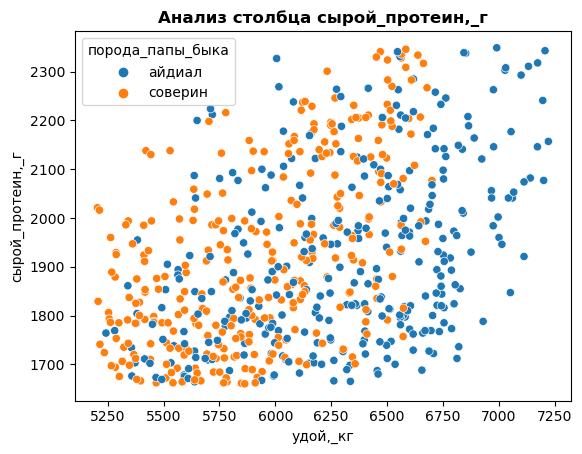

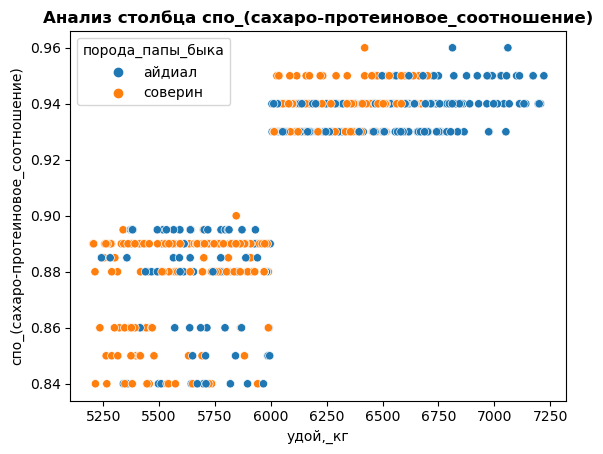

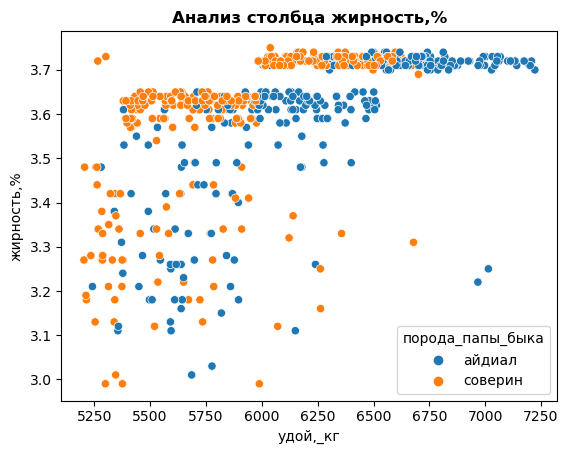

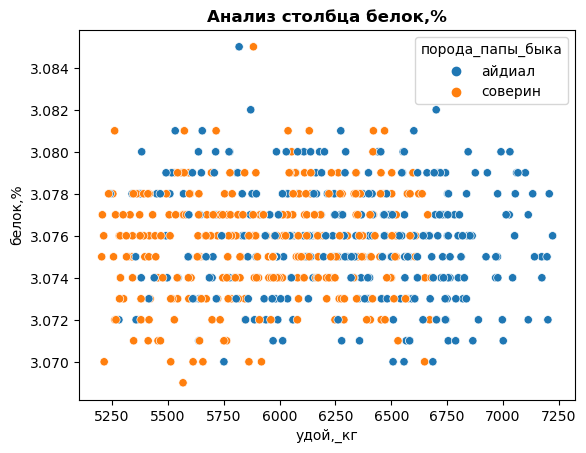

In [30]:
graphs_scatter(ferma_main, 'удой,_кг','порода_папы_быка')

### Вывод
По результатам анализа категориальных признаков можно сделать вывод, что зависимость присутствует для ЭКЕ и протеина. СПО следует сделать категориальным по границе 0.91

## Шаг 5. Задача регрессии

In [31]:
def linear_regression(data, categories,numbers):
    RANDOM_STATE = 42
    X = data.drop('удой,_кг', axis=1)
    y = data['удой,_кг']
    X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=RANDOM_STATE)    
    encoder = OneHotEncoder(drop='first', sparse_output=False,handle_unknown='ignore')
    X_train_ohe = encoder.fit_transform(X_train[categories])
    X_test_ohe = encoder.transform(X_test[categories])
    encoder_col_names = encoder.get_feature_names_out()
    
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train[numbers])
    X_test_scaled = scaler.transform(X_test[numbers])
    
    X_train_ohe = pd.DataFrame(X_train_ohe, columns=encoder_col_names)
    X_test_ohe = pd.DataFrame(X_test_ohe, columns=encoder_col_names)
    
    X_train_scaled = pd.DataFrame(X_train_scaled, columns=numbers)
    X_test_scaled = pd.DataFrame(X_test_scaled, columns=numbers)
    
    X_train = pd.concat([X_train_ohe, X_train_scaled], axis=1)
    X_test = pd.concat([X_test_ohe, X_test_scaled], axis=1)
    
    model_lr  = LinearRegression()
    model_lr.fit(X_train, y_train)
    predictions = model_lr.predict(X_test)
    r2 = r2_score(y_test, predictions)
    display(r2)
    residuals = y_test - predictions
    fig = plt.hist(residuals,color = 'blue', edgecolor = 'black',bins = 10)
    plt.xlabel('Остатки')
    plt.title(f'Распределение остатков',fontweight = "bold")
    plt.show()
    
    fig = sns.scatterplot(x=residuals, y=predictions)
    plt.xlabel('Предсказания')
    plt.ylabel('Остатки')
    plt.title(f'Распределение остатков',fontweight = "bold")
    plt.show()
    
    mae = mean_absolute_error(y_test, predictions)
    mse = mean_squared_error(y_test, predictions)
    rmse = np.sqrt(mse)
    return predictions,r2,mae,mse,rmse,model_lr,encoder,scaler 

0.752688984514369

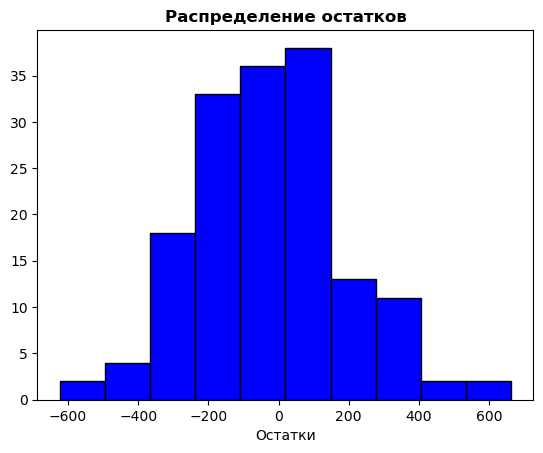

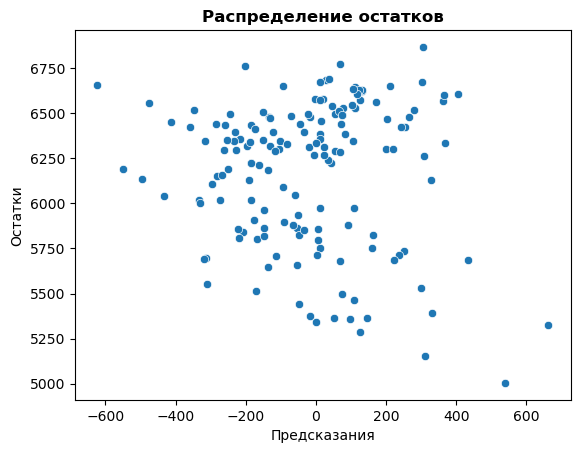

In [32]:
categories = ['порода', 'тип_пастбища', 'порода_папы_быка','возраст']
numbers = ['эке_(энергетическая_кормовая_единица)', 'сырой_протеин,_г', 'спо_(сахаро-протеиновое_соотношение)']
predictions_1,r2_1,mae_1,mse_1,rmse_1,model_lr,encoder,scaler =linear_regression(ferma_main, categories,numbers)

0.7903877940199925

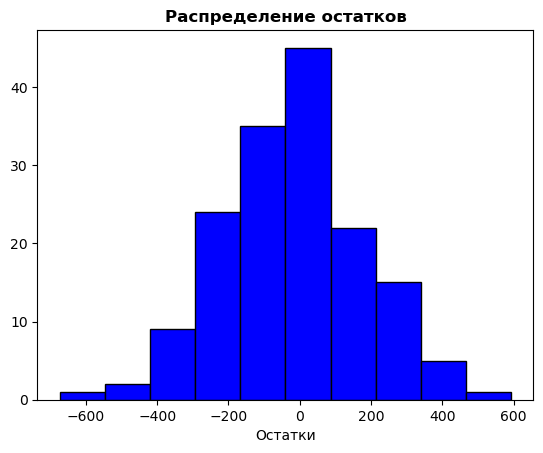

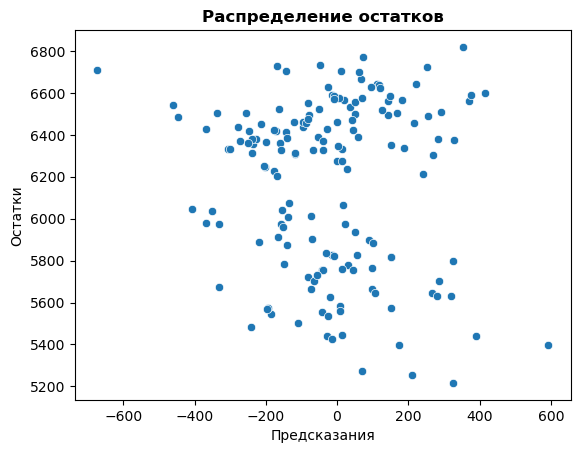

In [33]:
data_2= ferma_main
data_2.loc[data_2['спо_(сахаро-протеиновое_соотношение)']<0.91, ['спо_(сахаро-протеиновое_соотношение)']] = 0
data_2.loc[data_2['спо_(сахаро-протеиновое_соотношение)']>=0.91, ['спо_(сахаро-протеиновое_соотношение)']] = 1
data_2['эке_(энергетическая_кормовая_единица)'] = data_2['эке_(энергетическая_кормовая_единица)']**2
categories = ['порода', 'тип_пастбища', 'порода_папы_быка','возраст']
numbers = ['эке_(энергетическая_кормовая_единица)', 'сырой_протеин,_г', 'спо_(сахаро-протеиновое_соотношение)']
predictions_2,r2_2,mae_2,mse_2,rmse_2,model_lr,encoder,scaler =linear_regression(data_2, categories,numbers)


0.8023577428031077

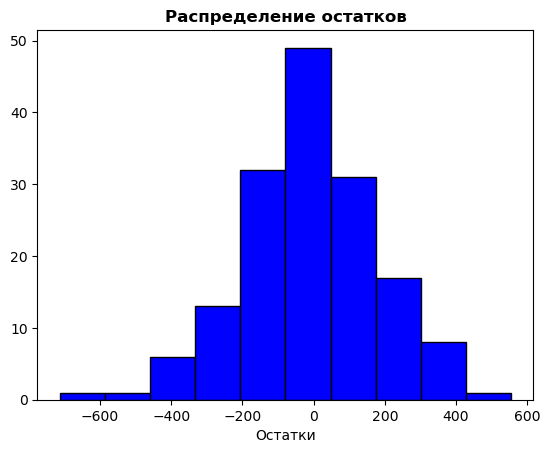

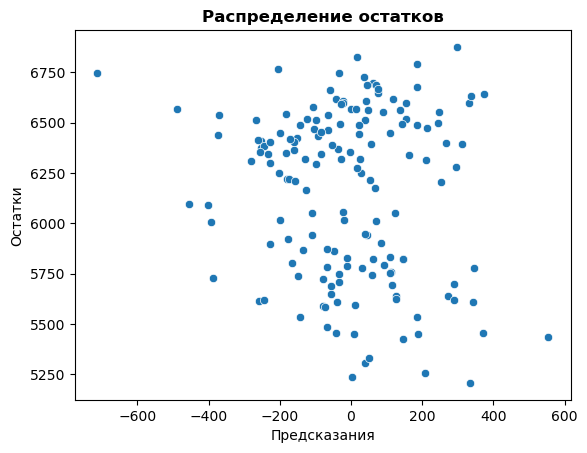

In [34]:
data_3= data_2.merge(ferma_dad, how  ='inner', on = 'id')
categories = ['порода', 'тип_пастбища', 'порода_папы_быка','имя_папы','возраст','спо_(сахаро-протеиновое_соотношение)']
numbers = ['эке_(энергетическая_кормовая_единица)', 'сырой_протеин,_г', ]
predictions_3,r2_3,mae_3,mse_3,rmse_3,model_lr,encoder,scaler =linear_regression(data_3, categories,numbers)


In [35]:
display(f'Показатели качества модели №1 R2={r2_1:.2f}, MAE={mae_1:.2f} MSE={mse_1:.2f} RMSE={rmse_1:.2f}')
display(f'Показатели качества модели №2 R2={r2_2:.2f}, MAE={mae_2:.2f} MSE={mse_2:.2f} RMSE={rmse_2:.2f}')
display(f'Показатели качества модели №3 R2={r2_3:.2f}, MAE={mae_3:.2f} MSE={mse_3:.2f} RMSE={rmse_3:.2f}')

'Показатели качества модели №1 R2=0.75, MAE=169.07 MSE=46380.33 RMSE=215.36'

'Показатели качества модели №2 R2=0.79, MAE=153.91 MSE=39310.35 RMSE=198.27'

'Показатели качества модели №3 R2=0.80, MAE=148.84 MSE=37065.53 RMSE=192.52'

In [36]:
display('95% доверительный интервал =', st.norm.interval(0.95, loc=np.mean(predictions_3), scale=st.sem(predictions_3)))

'95% доверительный интервал ='

(6095.653019851755, 6225.769682963654)

### Вывод
R2 третьей модели наибольший, ошибка составлеяет также наименьшую величину 193 в удое. Возьмем ее для прогноза по датафрейме cow_buy

In [37]:
cow_buy_logic=cow_buy
data_4=ferma_main
cow_buy_logic['спо_(сахаро-протеиновое_соотношение)']=data_4['спо_(сахаро-протеиновое_соотношение)'].mean()*1.05
cow_buy_logic.loc[cow_buy_logic['спо_(сахаро-протеиновое_соотношение)']<0.91, ['спо_(сахаро-протеиновое_соотношение)']] = 0
cow_buy_logic.loc[cow_buy_logic['спо_(сахаро-протеиновое_соотношение)']>=0.91, ['спо_(сахаро-протеиновое_соотношение)']] = 1
cow_buy_logic['эке_(энергетическая_кормовая_единица)']=data_4['эке_(энергетическая_кормовая_единица)'].mean()*1.05
cow_buy_logic = cow_buy_logic.rename(columns={'текущая_жирность,%': 'жирность,%','текущий_уровень_белок,%': 'белок,%'})
cow_buy_logic['сырой_протеин,_г']=data_4['сырой_протеин,_г'].mean()*1.05

In [38]:
def linear_regression_predictions(data_predictions,model_lr,encoder,scaler ):
    X_test=data_predictions
    X_ohe = encoder.transform(X_test[categories])
    encoder_col_names = encoder.get_feature_names_out()
    X_scaled = scaler.transform(X_test[numbers])
    X_ohe = pd.DataFrame(X_ohe, columns=encoder_col_names)
    X_scaled = pd.DataFrame(X_scaled, columns=numbers)
    X_predict= pd.concat([X_ohe, X_scaled], axis=1)
    predictions = model_lr.predict(X_predict)
    return predictions

categories = ['порода', 'тип_пастбища', 'порода_папы_быка','имя_папы','возраст','спо_(сахаро-протеиновое_соотношение)']
numbers = ['эке_(энергетическая_кормовая_единица)', 'сырой_протеин,_г', ]
cow_buy['удой,_кг']=linear_regression_predictions(cow_buy_logic,model_lr,encoder,scaler )
cow_buy


порода тип_пастбища порода_папы_быка  имя_папы  \
0      висбикайдиал    холмистое           айдиал  геркулес   
1      висбикайдиал    равнинное          соверин    буйный   
2   рефлешнсоверинг    равнинное          соверин     барин   
3   рефлешнсоверинг    холмистое           айдиал    буйный   
4   рефлешнсоверинг    равнинное           айдиал    буйный   
5   рефлешнсоверинг    равнинное          соверин  геркулес   
6      висбикайдиал    холмистое           айдиал  геркулес   
7      висбикайдиал    равнинное          соверин    буйный   
8   рефлешнсоверинг    равнинное          соверин     барин   
9   рефлешнсоверинг    холмистое           айдиал    буйный   
10     висбикайдиал    холмистое          соверин  соловчик   
11  рефлешнсоверинг    равнинное          соверин  геркулес   
12     висбикайдиал    холмистое           айдиал  геркулес   
13     висбикайдиал    холмистое          соверин     барин   
14  рефлешнсоверинг    равнинное          соверин     барин   
15  рефлешнсоверинг    холмистое           айдиал    буйный   
16     висбикайдиал    холмистое          соверин  соловчик   
17  рефлешнсоверинг    равнинное          соверин  геркулес   
18     висбикайдиал    равнинное          соверин    буйный   
19  рефлешнсоверинг    равнинное           айдиал    буйный   

    текущая_жирность,%  текущий_уровень_белок,%      возраст  \
0                 3.58                    3.076  более_2_лет   
1                 3.54                    3.081  менее_2_лет   
2                 3.59                    3.074  более_2_лет   
3                 3.40                    3.061  более_2_лет   
4                 3.64                    3.074  более_2_лет   
5                 3.63                    3.053  менее_2_лет   
6                 3.58                    3.076  более_2_лет   
7                 3.57                    3.079  более_2_лет   
8                 3.59                    3.074  более_2_лет   
9                 3.40                    3.079  менее_2_лет   
10                3.73                    3.055  более_2_лет   
11                3.73                    3.073  более_2_лет   
12                3.68                    3.046  более_2_лет   
13                3.42                    3.075  менее_2_лет   
14                3.59                    3.074  более_2_лет   
15                3.40                    3.065  более_2_лет   
16                3.73                    3.079  более_2_лет   
17                3.77                    3.053  менее_2_лет   
18                3.34                    3.069  более_2_лет   
19                3.64                    3.074  более_2_лет   

    спо_(сахаро-протеиновое_соотношение)  \
0                                    0.0   
1                                    0.0   
2                                    0.0   
3                                    0.0   
4                                    0.0   
5                                    0.0   
6                                    0.0   
7                                    0.0   
8                                    0.0   
9                                    0.0   
10                                   0.0   
11                                   0.0   
12                                   0.0   
13                                   0.0   
14                                   0.0   
15                                   0.0   
16                                   0.0   
17                                   0.0   
18                                   0.0   
19                                   0.0   

    эке_(энергетическая_кормовая_единица)     удой,_кг  
0                              223.975483  6200.777052  
1                              223.975483  5949.402831  
2                              223.975483  5888.996483  
3                              223.975483  6203.779599  
4                              223.975483  6151.195810  
5                              223.975483  5987.758108  
6                   

### Вывод
По третьей модели обучения получены величины удоя для покупаемых коров.

## Шаг 6. Задача классификации

array(['порода_рефлешнсоверинг', 'тип_пастбища_холмистое',
       'порода_папы_быка_соверин', 'имя_папы_буйный', 'имя_папы_геркулес',
       'имя_папы_соловчик', 'возраст_менее_2_лет',
       'спо_(сахаро-протеиновое_соотношение)_1.0'], dtype=object)

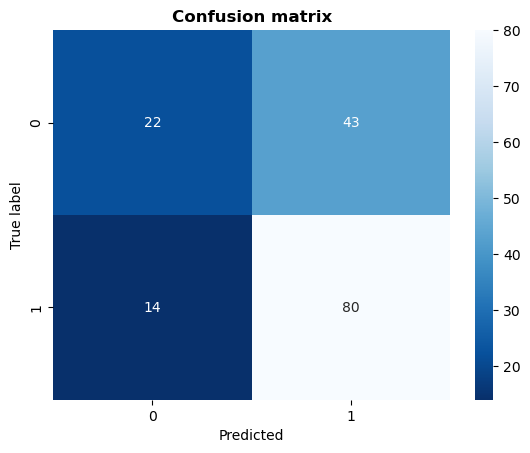

Порог  Precision
0    0.65   0.833333
1    0.66   0.857143
2    0.67   0.844444
3    0.68   0.853659
4    0.69   0.837838
5    0.70   0.837838
6    0.71   0.828571
7    0.72   0.823529
8    0.73   0.838710
9    0.74   0.807692
10   0.75   0.791667
11   0.76   0.894737
12   0.77   0.882353
13   0.78   0.866667
14   0.79   0.909091
15   0.80   0.900000
16   0.81   0.875000
17   0.82   1.000000
18   0.83   1.000000
19   0.84   1.000000

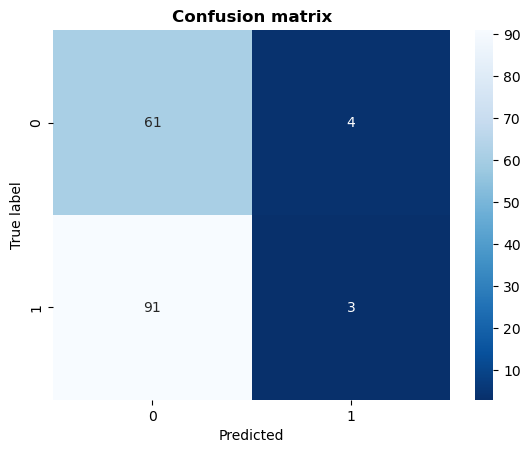

array([0.79353937, 0.81787639, 0.65290621, 0.47069582, 0.67504462,
       0.17783905, 0.79353937, 0.77738834, 0.65290621, 0.84111297,
       0.25955622, 0.5800714 , 0.1773737 , 0.79738196, 0.65290621,
       0.56613483, 0.77771877, 0.17686592, 0.5751378 , 0.67504462])

array([False, False, False, False, False, False, False, False, False,
        True, False, False, False, False, False, False, False, False,
       False, False])

In [43]:
def logistic_regression(data, categories,numbers,data_predictions):
    RANDOM_STATE = 42
    X = data.drop('вкус_молока', axis=1)
    y = data['вкус_молока']
    X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=RANDOM_STATE)    

    encoder = OneHotEncoder(drop='first', sparse_output=False,handle_unknown='ignore')
    X_train_ohe = encoder.fit_transform(X_train[categories])
    X_test_ohe = encoder.transform(X_test[categories])
    
    encoder_col_names = encoder.get_feature_names_out()
    display(encoder_col_names)
    
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train[numbers])
    X_test_scaled = scaler.transform(X_test[numbers])
    
    X_train_ohe = pd.DataFrame(X_train_ohe, columns=encoder_col_names)
    X_test_ohe = pd.DataFrame(X_test_ohe, columns=encoder_col_names)
    
    X_train_scaled = pd.DataFrame(X_train_scaled, columns=numbers)
    X_test_scaled = pd.DataFrame(X_test_scaled, columns=numbers)
    
    X_train = pd.concat([X_train_ohe, X_train_scaled], axis=1)
    X_test = pd.concat([X_test_ohe, X_test_scaled], axis=1)
   
    clf = LogisticRegression()
    clf=clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    recall = recall_score(y_pred,y_test)
    precision = precision_score(y_pred,y_test)
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues_r')
    plt.title(f'Confusion matrix',fontweight = "bold")
    plt.ylabel('True label')
    plt.xlabel('Predicted')
    plt.show() 
    y_proba = clf.predict_proba(X_test)[:,1] 
    
    data_temp = pd.DataFrame(zip(y_test, y_proba),
             columns = ['y_valid', 'y_proba']).sort_values(by='y_proba',ascending=False)
    thresholds = [round(i,2) for i in np.linspace(0.65,0.85,num =20,endpoint=False)]
    columns = []
    for i in thresholds:
        columns.append(i)
        data_temp[i] = data_temp['y_proba'].apply(lambda x: 1 if x > i else 0 )
    porog = []
    porog = pd.DataFrame(columns=['Порог', 'Precision'])
    rw = 0
    for i in data_temp.columns[2:]:
        precision = precision_score(data_temp['y_valid'],data_temp[i])
        porog.loc[rw] = [i, precision]
        rw = rw+1
    display(porog)
    lim=porog.query('Precision==1')['Порог'].min()
    
    sns.heatmap(confusion_matrix(y_test, data_temp[lim]), annot=True, fmt='d', cmap='Blues_r')
    plt.title(f'Confusion matrix',fontweight = "bold")
    plt.ylabel('True label')
    plt.xlabel('Predicted')
    plt.show() 
    
    X_test=data_predictions
    X_ohe = encoder.transform(X_test[categories])
    encoder_col_names = encoder.get_feature_names_out()
    X_scaled = scaler.transform(X_test[numbers])
    X_ohe = pd.DataFrame(X_ohe, columns=encoder_col_names)
    X_scaled = pd.DataFrame(X_scaled, columns=numbers)
    X_predict= pd.concat([X_ohe, X_scaled], axis=1)
    predictions_cow_buy_new_scaled = clf.predict_proba(X_predict)[:,1] > lim
    predictions_cow_buy_new_scaled  = ['Вкусное' if x==True else 'Не вкусное' for x in predictions_cow_buy_new_scaled]
    return predictions_cow_buy_new_scaled

    
data_3.loc[data_3['вкус_молока']=='невкусно', ['вкус_молока']] = 0
data_3.loc[data_3['вкус_молока']=='вкусно', ['вкус_молока']] = 1
data_3['вкус_молока'] =data_3['вкус_молока'].astype(float)
categories = ['порода', 'тип_пастбища', 'порода_папы_быка','имя_папы','возраст','спо_(сахаро-протеиновое_соотношение)']
numbers = ['эке_(энергетическая_кормовая_единица)', 'сырой_протеин,_г','жирность,%', 'белок,%', ]
cow_buy['вкус_молока']=logistic_regression(data_3, categories,numbers,cow_buy_logic)

Выберем в итоговой таблице коров с вкусным молоком и величиной удоя>6095 (согласно доверительного интервала)

In [40]:
display(cow_buy[cow_buy['вкус_молока'] == 'Вкусное'])

порода тип_пастбища порода_папы_быка имя_папы  текущая_жирность,%  \
9  рефлешнсоверинг    холмистое           айдиал   буйный                 3.4   

   текущий_уровень_белок,%      возраст  спо_(сахаро-протеиновое_соотношение)  \
9                    3.079  менее_2_лет                                   0.0   

   эке_(энергетическая_кормовая_единица)     удой,_кг вкус_молока  
9                             223.975483  5983.952979     Вкусное

### Вывод
Обучена модель логистической регрессии по тренировочным данным. Минимальный порог для минимизации ошибки первого рода составил 0.82. Согласно полученных данных для датафрейма cow_buy молоко вкусным будет только для одной коровы 

# Общие выводы

По результатам анализа в датафрейм имеются явные дубликаты, некорректны типы столбцов, стоит преобразовать в нижний регистр значения ячеек для удаления неявных дубликатов

 По результатам предобработки в датафреймах удалены явные дубликаты, изменены типы столбцов , преобразованы в нижний регистр значения ячеек
 
В столбцах порода_папы_быка и тип_пастбища есть одинаковые имена. Заменим 'айдиалл' на 'айдиал' и 'равнинные' на 'равнинное'

В датафрейме 'cow_buy' распределение категориальных признаков удовлетворительное. Явные выбросы отсутсвуют

В датафрейме 'ferma_main' распределение категориальных признаков удовлетворительное. По столбцу "тип_пастбища" "равнинного" меньше в разы чем остальных типов. 

Нормальное распределение присутсвует только в столбце "белок,%" датафрейма 'ferma_main'. В столбце 'удой,_кг' удалены значения более 45000

По результатам анализа категориальных признаков можно сделать вывод, что зависимость присутствует для ЭКЕ и протеина. СПО следует сделать категориальным по границе 0.91

R2 третьей модели линейной регрессии наибольший, ошибка составлеяет также наименьшую величину 193 в удое. Данная модель взять для анализа cow_buy

По третьей модели обучения получены величины удоя для покупаемых коров.

Обучена модель логистической регрессии по тренировочным данным. Минимальный порог для минимизации ошибки первого рода составил 0.82. Согласно полученных данных для датафрейма cow_buy молоко вкусным будет только для одной коровы.
